This will model the data using a Gradient Boosting Machine

In [29]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import lightgbm as lgb
import sklearn
from sklearn import metrics
from data_utils import load_dataset, core_metrics,map_model
import plotly.io as pio
# set this to 'jupyterlab' for interactive
pio.renderers.default = "png" 

#plotly.io.templates.default = 'plotly_dark'

In [2]:
X_train, X_test, y_train, y_test = load_dataset(categorize_bedrooms=True)

X Columns: {} Index(['date', 'latitude', 'longitude', 'area', 'bedrooms', 'pets',
       'furnished', 'unit_type'],
      dtype='object')
X Shape: (306414, 8)
y Shape: (306414, 1)


In [21]:
X_train.head()

,date,latitude,longitude,area,bedrooms,pets,furnished,unit_type
54657,1.509146e+09,49.327165,-123.065505,2811.0,3.0,0,0,house
228652,1.549050e+09,49.266928,-123.118694,939.0,2.0,0,0,condo
90936,1.517107e+09,49.220747,-122.943295,950.0,2.0,0,0,house
298293,1.562619e+09,49.217926,-123.064722,1100.0,2.0,0,0,house
59426,1.510255e+09,49.232261,-122.952811,800.0,2.0,0,0,apartment


In [3]:
## hyperparameter search

# from sklearn.model_selection import RandomizedSearchCV

# lg = lgb.LGBMRegressor(num_leaves=192,learning_rate=0.05,n_estimators=200,objective='l2',silent=False)

# param_dist = {'num_leaves': [31,51,101,151,201,301,401],
#               'max_depth': [10,20,30,40,-1],
#               'lambda_l2': [0.01,0.03,0.1,0.3],
#               'bagging_fraction': [1.0,0.8,0.5]
#              }

# # if scoring is not provided, the estimator's scoring paramter is used
# cv = RandomizedSearchCV(lg,param_dist,n_iter=35,scoring='neg_median_absolute_error')

# search = cv.fit(X_train,y_train)

# best_params = search.best_params_

# lg.set_params(**best_params)

# lg.fit(X_train,y_train)

# y_pred = lg.predict(X_test)

# print("Best Params: {}".format(best_params))
# metrics.mean_absolute_error(y_test,y_pred)

[50]	Train's l1: 240.841	Test's l1: 252.44
[100]	Train's l1: 198.653	Test's l1: 219.685
[150]	Train's l1: 179.258	Test's l1: 206.807
[200]	Train's l1: 167.01	Test's l1: 199.908
[250]	Train's l1: 157.204	Test's l1: 194.734
[300]	Train's l1: 148.787	Test's l1: 190.368
[350]	Train's l1: 141.054	Test's l1: 186.337
[400]	Train's l1: 134.468	Test's l1: 183.202
[450]	Train's l1: 128.654	Test's l1: 180.547
[500]	Train's l1: 123.081	Test's l1: 178.078
[550]	Train's l1: 118.301	Test's l1: 176.161
[600]	Train's l1: 113.841	Test's l1: 174.317
[650]	Train's l1: 109.664	Test's l1: 172.615
[700]	Train's l1: 106.07	Test's l1: 171.205
[750]	Train's l1: 102.594	Test's l1: 169.987
[800]	Train's l1: 99.4482	Test's l1: 168.834
[850]	Train's l1: 96.4953	Test's l1: 167.831
[900]	Train's l1: 93.7909	Test's l1: 166.913
[950]	Train's l1: 91.1272	Test's l1: 166.149
[1000]	Train's l1: 88.639	Test's l1: 165.377
[1050]	Train's l1: 86.2985	Test's l1: 164.707
[1100]	Train's l1: 84.1008	Test's l1: 164.053
[1150]	Train

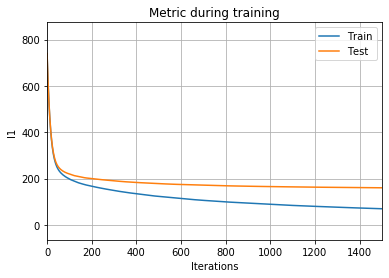

In [12]:
# using lgbm api

train_data = lgb.Dataset(X_train, label=y_train,free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test)
params = {'objective':'regression', 'metric':'mae','learning_rate': 0.05, 'num_leaves': 1001, "max_depth": 30, "lambda_l2": 0.03}
evals_result = {}
model = lgb.train(params,
                  train_data,
                  num_boost_round=1500,
                  valid_sets=[train_data,test_data],
                  valid_names=['Train','Test'],
                  verbose_eval=50,
                  evals_result=evals_result,
                  )

lgb.plot_metric(evals_result)
y_pred = model.predict(X_test)

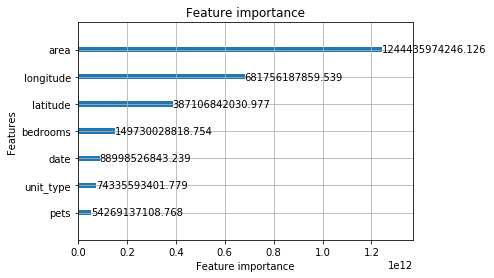

In [18]:
## Plot the tree

# from matplotlib import pyplot as plt
# lgb.plot_tree(model,figsize=(150,150))
# plt.savefig('gbm-tree.svg',format='svg')

lgb.plot_importance(model,importance_type='gain')

Mean Absolute Error: 160
Median Absolute Error: 84
Explained Variance: 0.93


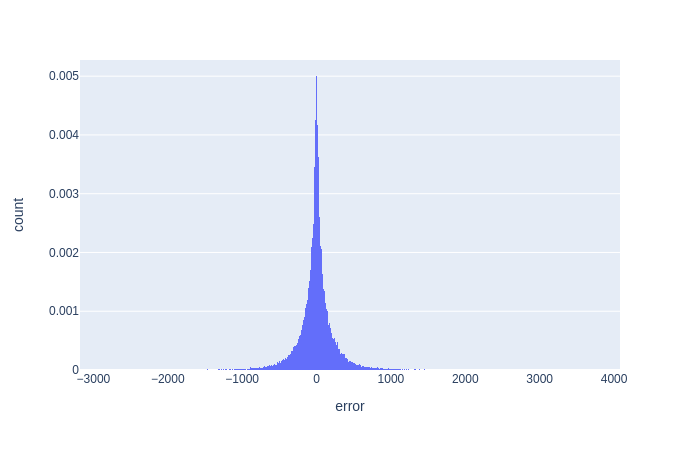

In [27]:
from data_utils import core_metrics

core_metrics(y_test,y_pred)

Using cached coordinates


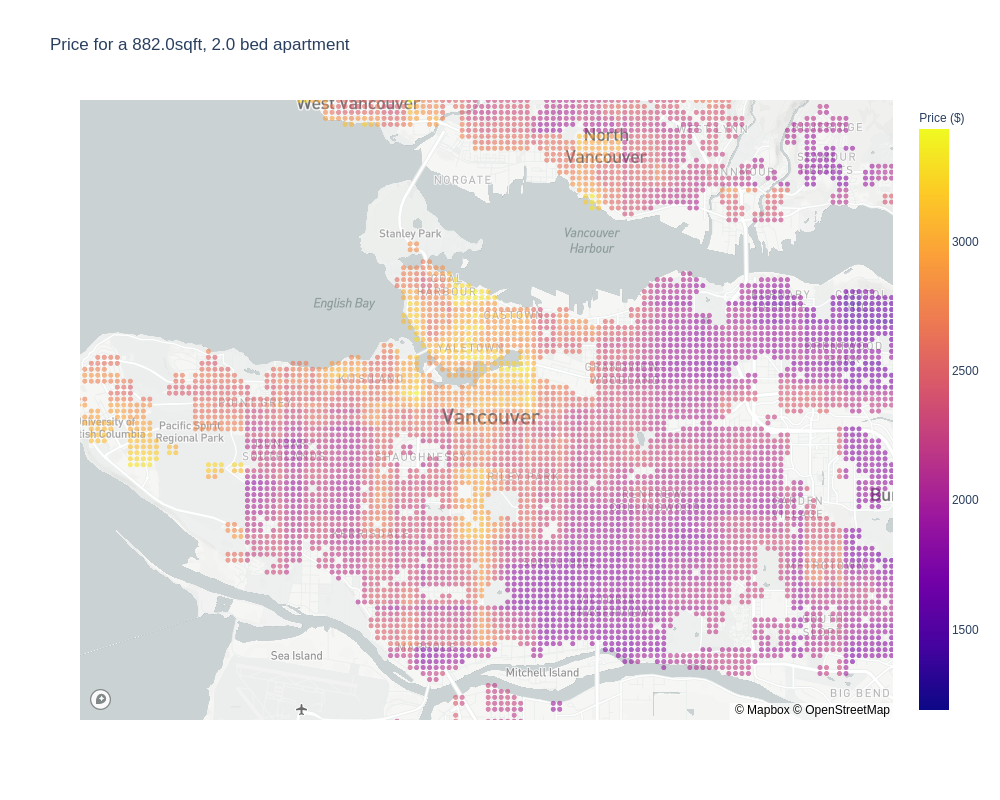

In [35]:
from data_utils import map_model, time_evolution

fig = map_model(X_train,model)
fig.show(height=800,width=1000)

Using cached coordinates


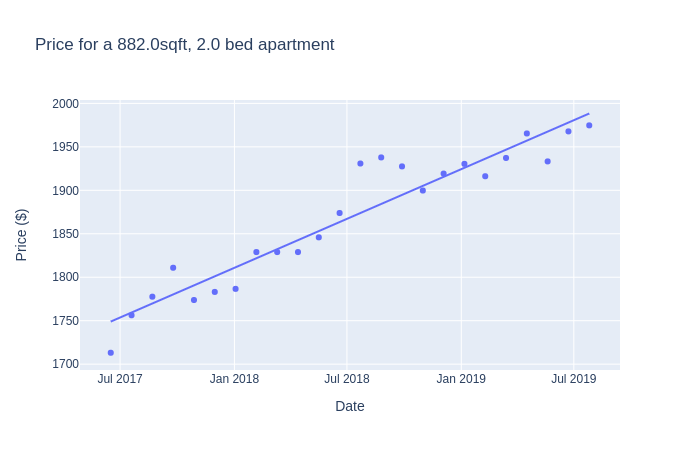

In [36]:
time_evolution(X_train,model)